In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data_path = "../data/africa.csv"
df = pd.read_csv(data_path)

In [81]:
df

,language,family,native_speakers,country
0,ǂKxʼaoǁʼae,Kxʼa,5000,Namibia
1,ǂKxʼaoǁʼae,Kxʼa,5000,Botswana
2,Abon,Niger–Congo,800,Cameroon
3,Abron,Niger–Congo,1393000,Ghana
4,Abron,Niger–Congo,1393000,Ivory Coast
...,...,...,...,...
791,Zemba,Niger–Congo,25000,Angola
792,Zemba,Niger–Congo,25000,Namibia
793,Zhire,Niger–Congo,11000,Nigeria
794,Zhoa,Niger–Congo,2000,Cameroon


In [82]:
num_dups = df.duplicated().sum()
print(f"Num duplicated rows: {num_dups}")
print()
print("Rows with NA:")
df.isna().sum()

Num duplicated rows: 34

Rows with NA:


language           0
family             0
native_speakers    0
country            0
dtype: int64

In [83]:
df = df.drop_duplicates()

### Which Country in Africa has the Largest Number of Spoken Languages?

In [84]:
country_by_num_languages = (
    df.groupby('country')['language']
        .nunique()
        .sort_values(ascending=False)
        .head(10)
)
country_by_num_languages

country
Cameroon        95
Congo           79
Nigeria         73
Sudan           40
Burkina Faso    36
Ghana           34
Chad            24
Namibia         24
South Sudan     23
Mali            22
Name: language, dtype: int64

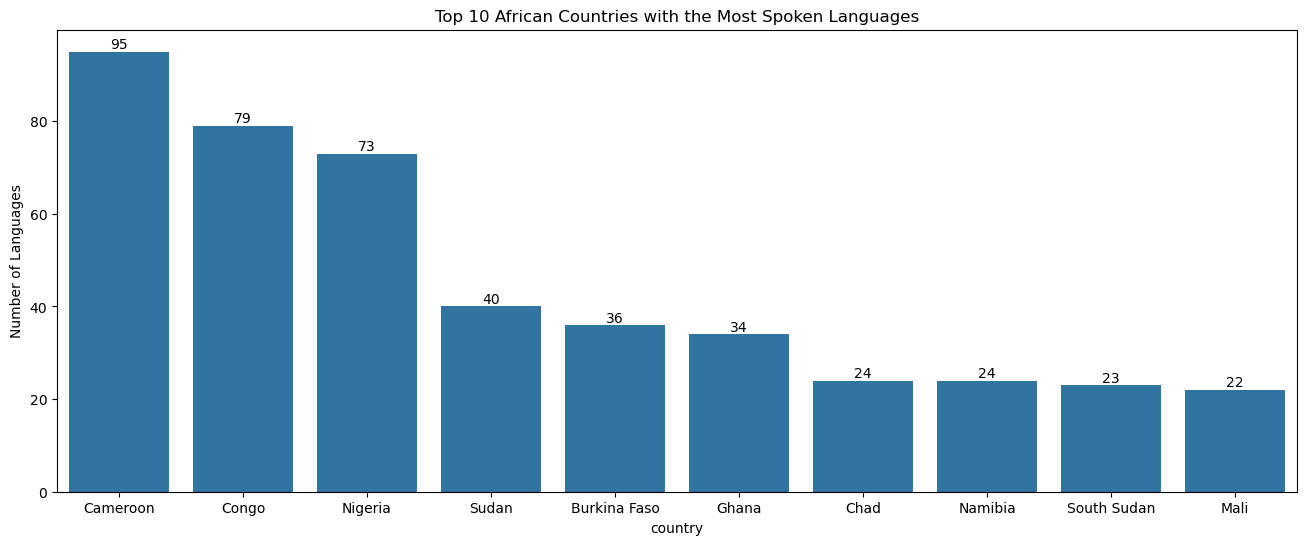

In [85]:
plt.figure(figsize=(16,6))
plt.title("Top 10 African Countries with the Most Spoken Languages")
ax = sns.barplot(country_by_num_languages)

for container in ax.containers:
    ax.bar_label(container)
    

plt.ylabel("Number of Languages")
plt.show()

**Cameroon has the most spoken languages at 96**

### Which Family of Languages has the Highest Density of Speakers?

In [179]:
'''family_most_speakers = (
    df.groupby('family')['native_speakers']
        .aggregate('sum')
        .sort_values(ascending=False)
    .head(10)
)
'''
df_unique_languages = df[['family', 'language', 'native_speakers']].drop_duplicates(keep="first")

family_most_speakers = (
    df_unique_languages.groupby('family')
        ['native_speakers']
    .aggregate('sum')
    .sort_values(ascending=False)
    .head(5)
    
)

df_unique_languages.head()
family_most_speakers.sort_values(ascending=False).head()

family
Niger–Congo      457401662
Afroasiatic      332500440
Nilo-Saharan      44817300
Indo-European     25365300
Austronesian      18000000
Name: native_speakers, dtype: int64

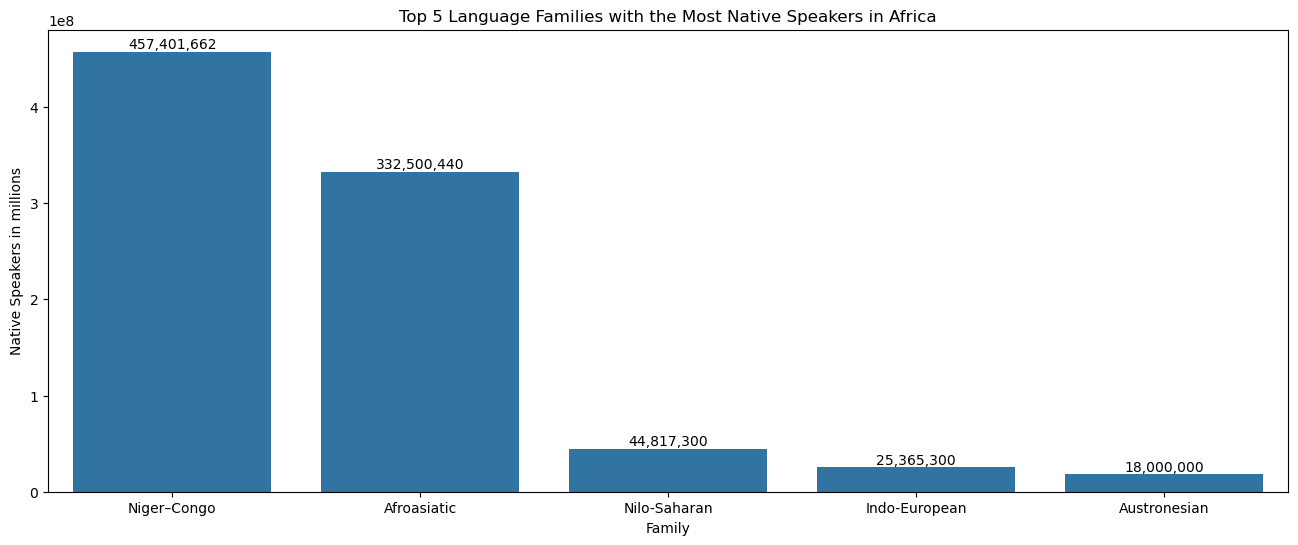

In [180]:
plt.figure(figsize=(16,6))

plt.title("Top 5 Language Families with the Most Native Speakers in Africa")
plt.ylabel("Native Speakers in millions")
plt.xlabel("Family")

ax = sns.barplot(family_most_speakers)

for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}")
    
plt.show()

**The Niger-Congo language has the high density of speakers with 457,401,662 Native Speakers**

### Are There Any Languages that Cut Across Multiple Countries?

In [88]:
multiple_countries = (
    df.groupby("language")['country']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)
multiple_countries

language
Arabic        12
Fulani        10
Soninke        8
Mooré          8
Gourmanché     6
Lozi           6
Khwe           5
Swahili        5
Bariba         5
Mampruli       5
Name: country, dtype: int64

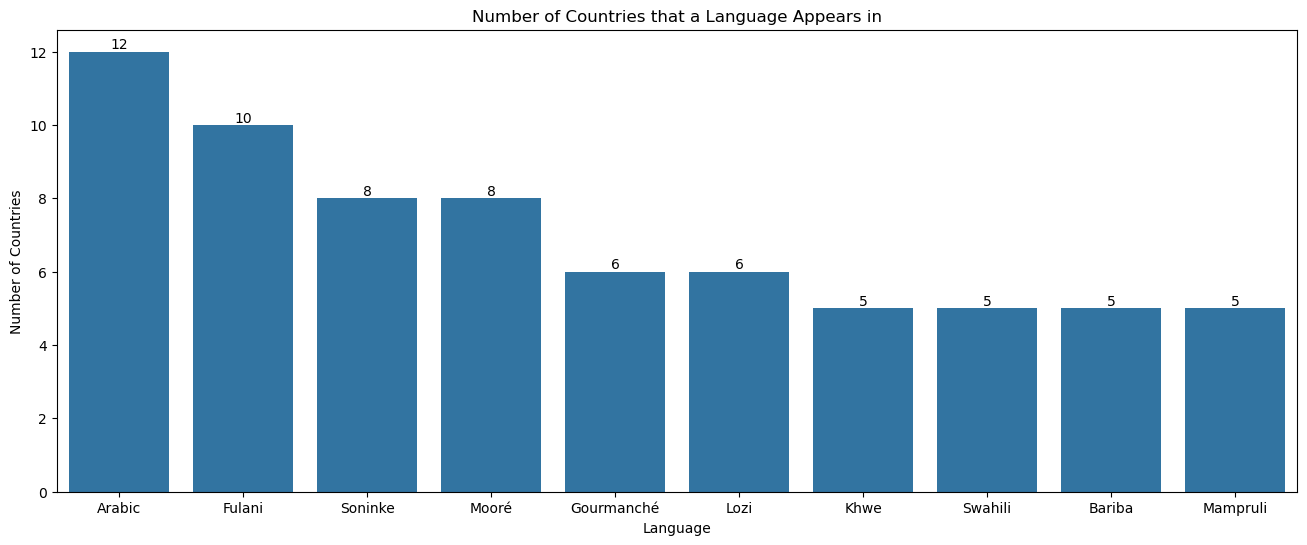

In [181]:
plt.figure(figsize=(16,6))
plt.title("Number of Countries that a Language Appears in")
plt.xlabel("Language")
plt.ylabel("Number of Countries")

ax = sns.barplot(multiple_countries)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()